In [1]:
import pandas as pd                           # Import pandas for data manipulation
import matplotlib.pyplot as plt               # Import matplotlib for plotting
 
# Import the ticker module from matplotlib, which provides tools to format axis tick labels (e.g., adding currency symbols, percentages, commas)
import matplotlib.ticker as mtick

import seaborn as sns                         # Import seaborn for advanced visualizations
from IPython.display import Markdown          # Import Markdown display utility

%matplotlib inline                 
sns.set(style="whitegrid")                    # Set seaborn theme to white grid

In [2]:
df = pd.read_excel(r'Super_Store.xlsx')

In [3]:
print("Shape:", df.shape)             # Print number of rows and columns
print("Columns:", df.columns)         # Display column names


Shape: (9994, 21)
Columns: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [4]:
df.head()                             # Show the first 5 rows of data 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()                            # Display data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
print(df.isnull().sum())              # Check for missing values in each column

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [7]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f"Total Sales: ${total_sales:,.2f}") 
print(f"Total Profit: ${total_profit:,.2f}")

Total Sales: $2,297,200.86
Total Profit: $286,397.02


In [8]:
# Group sales by product name, sort descending, and get top 10
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

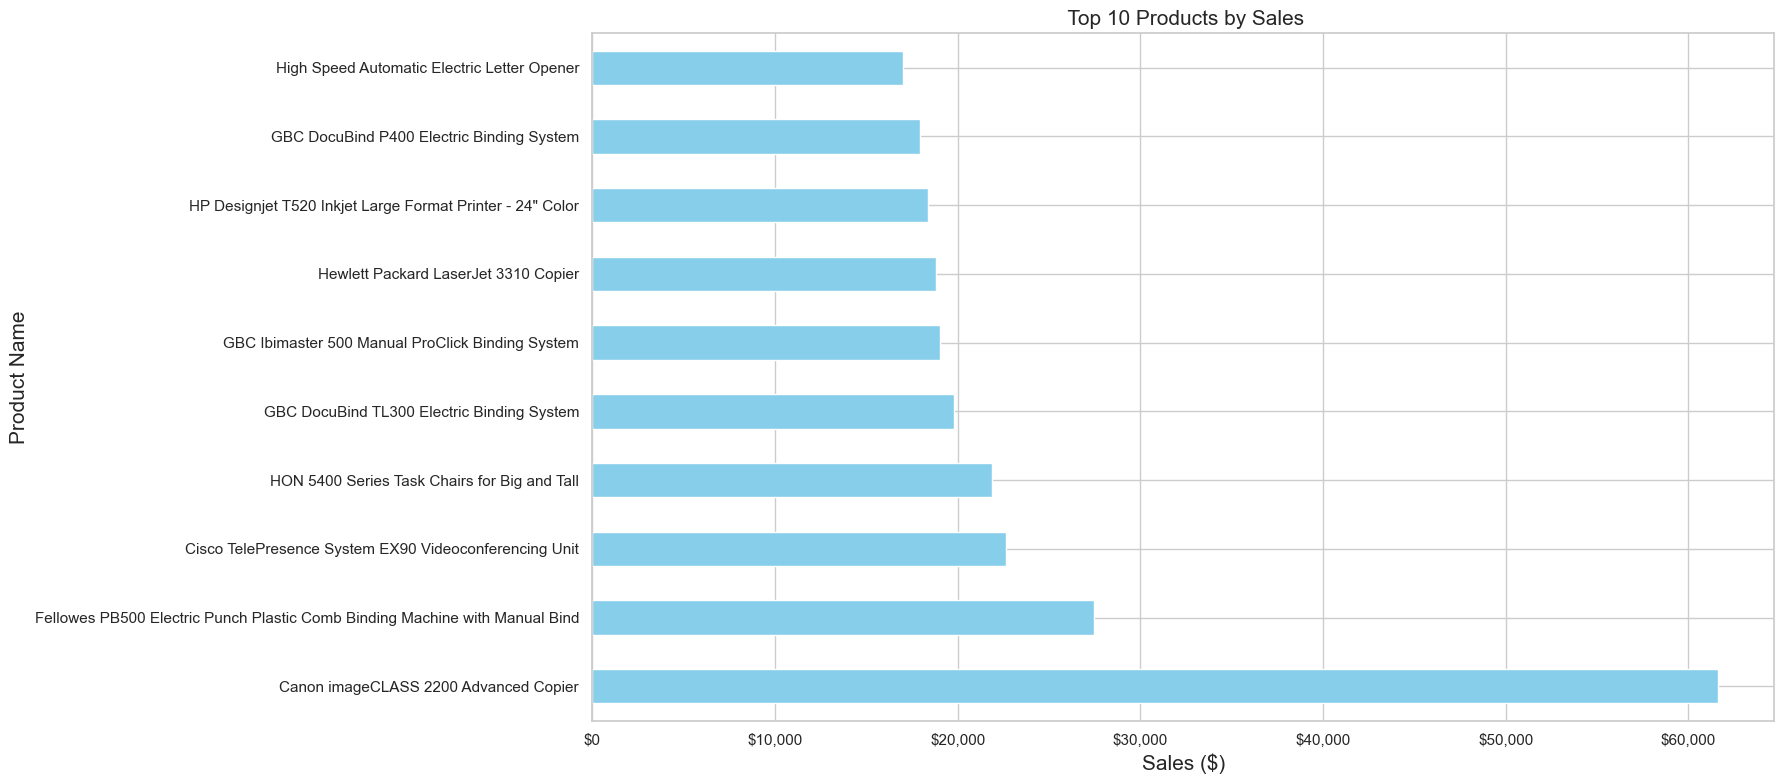

In [10]:
plt.figure(figsize=(18,8))                                     # Set plot size
top_products.plot(kind='barh', color='skyblue')                # Horizontal bar chart
plt.title(' Top 10 Products by Sales',size = 15 )              # Chart title
plt.xlabel('Sales ($)',size = 15)                              # Y-axis label
plt.ylabel('Product Name',size = 15)                           # X-axis label

# Format the x-axis tick labels to display as currency with commas and no decimal places (e.g., $1,000)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

# Automatically adjusts subplot params to give specified padding and prevent label overlap
plt.tight_layout()                               
plt.show()

In [11]:
df['Month'] = df['Order Date'].dt.to_period('M')

In [21]:
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales

Month
2014-01     14236.8950
2014-02      4519.8920
2014-03     55691.0090
2014-04     28295.3450
2014-05     23648.2870
2014-06     34595.1276
2014-07     33946.3930
2014-08     27909.4685
2014-09     81777.3508
2014-10     31453.3930
2014-11     78628.7167
2014-12     69545.6205
2015-01     18174.0756
2015-02     11951.4110
2015-03     38726.2520
2015-04     34195.2085
2015-05     30131.6865
2015-06     24797.2920
2015-07     28765.3250
2015-08     36898.3322
2015-09     64595.9180
2015-10     31404.9235
2015-11     75972.5635
2015-12     74919.5212
2016-01     18542.4910
2016-02     22978.8150
2016-03     51715.8750
2016-04     38750.0390
2016-05     56987.7280
2016-06     40344.5340
2016-07     39261.9630
2016-08     31115.3743
2016-09     73410.0249
2016-10     59687.7450
2016-11     79411.9658
2016-12     96999.0430
2017-01     43971.3740
2017-02     20301.1334
2017-03     58872.3528
2017-04     36521.5361
2017-05     44261.1102
2017-06     52981.7257
2017-07     45264.4160
2017-

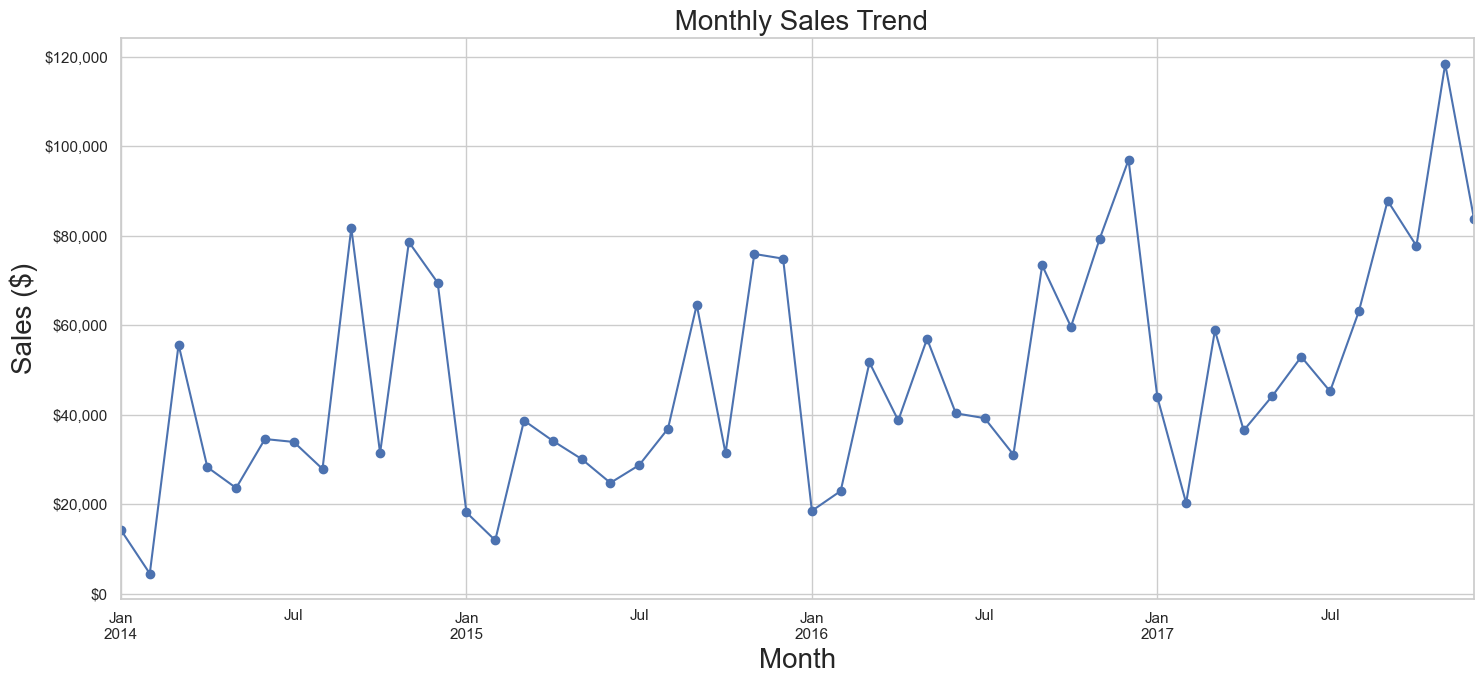

In [23]:
plt.figure(figsize=(15,7))                             # Set plot size
monthly_sales.plot(kind='line', marker='o')            # Create line plot with markers
plt.title(' Monthly Sales Trend',size = 20)            # Chart title
plt.ylabel('Sales ($)',size = 20)                      # Y-axis label
plt.xlabel('Month',size = 20)                          # X-axis label
plt.grid(True)                                         # Add gridlines

# Format the y-axis tick labels to display as currency with commas and no decimal places (e.g., $1,000)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

plt.tight_layout()                                   
plt.show()                               

In [25]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

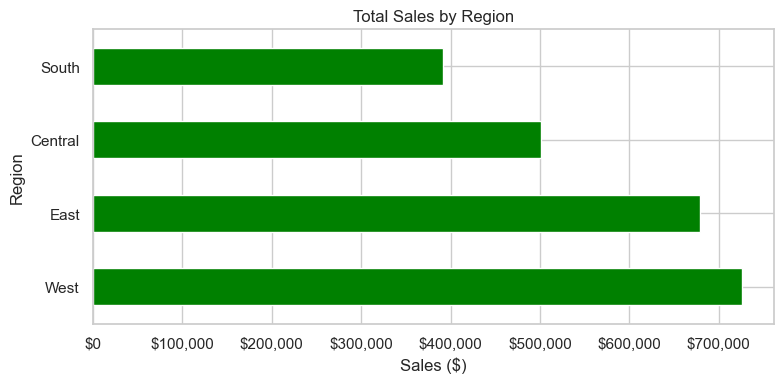

In [27]:
plt.figure(figsize=(8,4))                      # Set plot size
region_sales.plot(kind='barh', color='green')  
plt.title('Total Sales by Region')             # Chart title
plt.xlabel('Sales ($)')                        # X-axis label

# Format the x-axis tick labels to display as currency with commas and no decimal places (e.g., $1,000)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

plt.tight_layout()                             
plt.show()                                    

In [29]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending = False)
category_profit

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

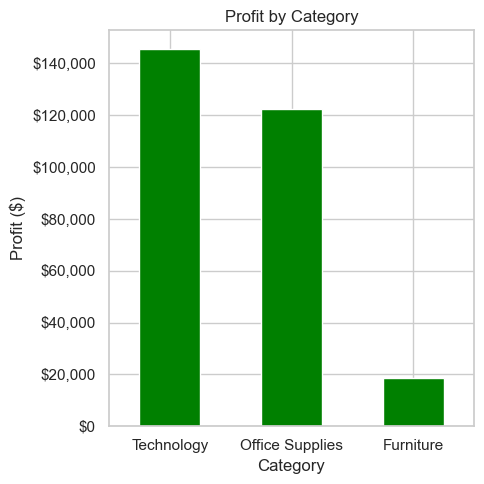

In [31]:
plt.figure(figsize=(5,5))                       # Set plot size
category_profit.plot(kind='bar', color='green') # Bar chart
plt.title('Profit by Category')                 # Chart title
plt.ylabel('Profit ($)')                        # Y-axis label
plt.xticks(rotation=0)                          # Keep category labels horizontal

# Format the y-axis tick labels to display as currency with commas and no decimal places (e.g., $1,000)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()                          
plt.show()    

In [43]:
# Group the data by 'State' and calculate total sales for each state, then sort in descending order
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
top_states

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64

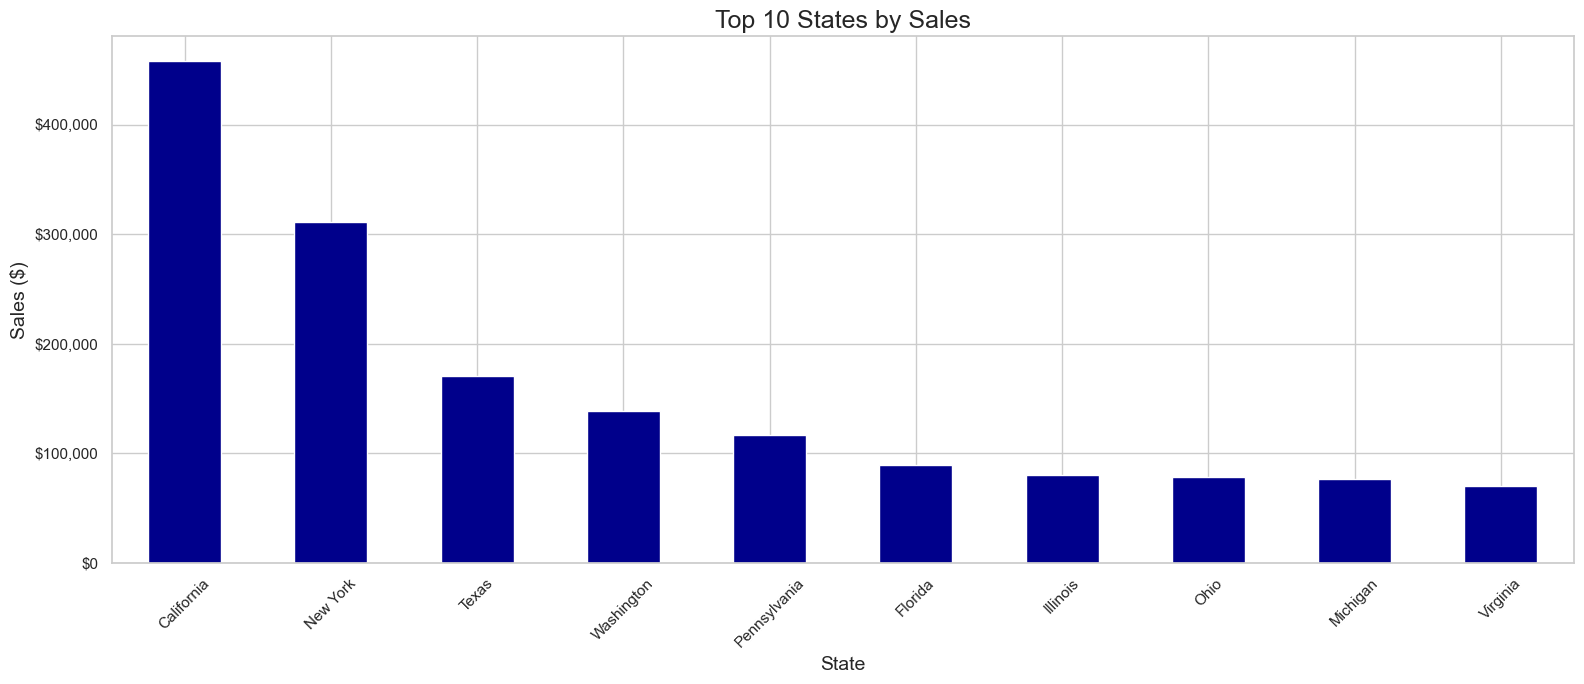

In [55]:
plt.figure(figsize=(16, 7))  # Set the size of the plot
top_states.plot(kind='bar', color='darkblue')  # Create a vertical bar chart

plt.title('Top 10 States by Sales', fontsize=18)  # Add chart title
plt.xlabel('State', fontsize=14)                  # Label for x-axis
plt.ylabel('Sales ($)', fontsize=14)              # Label for y-axis

# Format the y-axis tick labels to display as currency with commas and no decimal places (e.g., $1,000)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  

plt.xticks(rotation=45)     
plt.tight_layout()           
plt.show()  

In [61]:
Markdown(f"""

## 📊 **Summary of Findings:**


🔹 **Total Sales:** **${total_sales:,.2f}**

🔹 **Total Profit:** **${total_profit:,.2f}**

🔹 **Top Selling Product:** `{top_products.idxmax()}`

🔹 **Best Month by Sales:** `{monthly_sales.idxmax()}`

🔹 **Region with Highest Sales:**`{region_sales.idxmax()}`

🔹 **Most Profitable Category:** `{category_profit.idxmax()}`

""")




## 📊 **Summary of Findings:**


🔹 **Total Sales:** **$2,297,200.86**

🔹 **Total Profit:** **$286,397.02**

🔹 **Top Selling Product:** `Canon imageCLASS 2200 Advanced Copier`

🔹 **Best Month by Sales:** `2017-11`

🔹 **Region with Highest Sales:**`West`

🔹 **Most Profitable Category:** `Technology`

